In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout

tr = 1406
te = 156
day = 10

c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\watso\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\watso\appd

In [3]:
df = pd.read_csv("stock105_111.csv")
df

,date,Closing price
0,2016/1/4,139.5
1,2016/1/5,138.0
2,2016/1/6,135.5
3,2016/1/7,133.0
4,2016/1/8,134.0
...,...,...
1557,2022/5/23,528.0
1558,2022/5/24,520.0
1559,2022/5/25,524.0
1560,2022/5/26,514.0


In [4]:
train = df['Closing price']
train = train.iloc[0:tr]
train,train.shape

(0       139.5
 1       138.0
 2       135.5
 3       133.0
 4       134.0
         ...  
 1401    594.0
 1402    580.0
 1403    580.0
 1404    574.0
 1405    572.0
 Name: Closing price, Length: 1406, dtype: float64,
 (1406,))

In [5]:
test = df['Closing price']
test = test.iloc[tr:]
test,test.shape

(1406    572.0
 1407    571.0
 1408    580.0
 1409    575.0
 1410    575.0
         ...  
 1557    528.0
 1558    520.0
 1559    524.0
 1560    514.0
 1561    530.0
 Name: Closing price, Length: 156, dtype: float64,
 (156,))

In [6]:
train_set = np.array(train)
test_set = np.array(test)
type(train),type(train_set)

(pandas.core.series.Series, numpy.ndarray)

In [7]:
train_set = train_set.reshape(tr,-1)
test_set = test_set.reshape(te,-1)
train_set.shape,test_set.shape

((1406, 1), (156, 1))

In [8]:
test_set

array([[572.],
       [571.],
       [580.],
       [575.],
       [575.],
       [571.],
       [573.],
       [600.],
       [590.],
       [600.],
       [598.],
       [596.],
       [600.],
       [593.],
       [599.],
       [599.],
       [595.],
       [590.],
       [590.],
       [592.],
       [592.],
       [587.],
       [600.],
       [602.],
       [611.],
       [612.],
       [606.],
       [604.],
       [608.],
       [610.],
       [610.],
       [613.],
       [618.],
       [615.],
       [612.],
       [603.],
       [603.],
       [596.],
       [593.],
       [596.],
       [600.],
       [615.],
       [608.],
       [600.],
       [607.],
       [602.],
       [608.],
       [605.],
       [601.],
       [599.],
       [600.],
       [605.],
       [607.],
       [598.],
       [597.],
       [600.],
       [606.],
       [604.],
       [606.],
       [615.],
       [616.],
       [615.],
       [631.],
       [656.],
       [650.],
       [644.],
       [63

In [9]:
sc = MinMaxScaler(feature_range=(0, 1)) 
train_scaled = sc.fit_transform(train_set) 
test_scaled = sc.transform(test_set)
train_scaled,test_scaled

(array([[0.01477378],
        [0.01200369],
        [0.00738689],
        ...,
        [0.82825485],
        [0.81717452],
        [0.81348107]]),
 array([[0.81348107],
        [0.81163435],
        [0.82825485],
        [0.81902124],
        [0.81902124],
        [0.81163435],
        [0.81532779],
        [0.86518929],
        [0.84672207],
        [0.86518929],
        [0.86149584],
        [0.8578024 ],
        [0.86518929],
        [0.85226223],
        [0.86334257],
        [0.86334257],
        [0.85595568],
        [0.84672207],
        [0.84672207],
        [0.85041551],
        [0.85041551],
        [0.8411819 ],
        [0.86518929],
        [0.86888273],
        [0.88550323],
        [0.88734995],
        [0.87626962],
        [0.87257618],
        [0.87996307],
        [0.88365651],
        [0.88365651],
        [0.88919668],
        [0.89843029],
        [0.89289012],
        [0.88734995],
        [0.87072946],
        [0.87072946],
        [0.8578024 ],
        [0.852262

In [10]:
x_train = []
y_train = []
x_test = []
y_test = []

In [11]:
for i in range(day, len(train_scaled)):
    x_train.append(train_scaled[i - day:i, 0])
    y_train.append(train_scaled[i, 0])

In [12]:
x_train[20],y_train[20]

(array([0.01939058, 0.02308403, 0.02031394, 0.02677747, 0.02493075,
        0.02954755, 0.03047091, 0.03601108, 0.03601108, 0.03601108]),
 0.033240997229916885)

In [13]:
np.random.seed(5)
np.random.shuffle(x_train)
np.random.seed(5)
np.random.shuffle(y_train)
tf.random.set_random_seed(5)

In [14]:
x_train[20],y_train[20]

(array([0.33148661, 0.3388735 , 0.33610342, 0.33148661, 0.32779317,
        0.32409972, 0.32409972, 0.33148661, 0.32871653, 0.32040628]),
 0.3250230840258541)

In [15]:
#len(x_train),x_test[0]

In [16]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [17]:
for i in range(day, len(test_set)):
    x_test.append(test_scaled[i - day:i, 0])
    y_test.append(test_scaled[i, 0])

In [18]:
x_test[20],y_test[20]

(array([0.85041551, 0.8411819 , 0.86518929, 0.86888273, 0.88550323,
        0.88734995, 0.87626962, 0.87257618, 0.87996307, 0.88365651]),
 0.8836565096952907)

In [19]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
x_train = np.reshape(x_train, (x_train.shape[0],day,1))
x_test = np.reshape(x_test, (x_test.shape[0],day,1))
#x_train = sequence.pad_sequences(x_train, maxlen=5)
#x_test = sequence.pad_sequences(x_test, maxlen=5)

In [21]:
x_train.shape,x_test.shape

((1396, 10, 1), (146, 10, 1))

In [22]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 80,activation='relu'))
model.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [23]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['accuracy'])
model.summary()
model.fit(x_train,y_train,batch_size=32,epochs=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                57920     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81        
Total params: 98,801
Trainable params: 98,801
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1396/1396 [==============================] - 1s 814us/step - loss: 0.0401 - accuracy: 7.1633e-04
Epoch 2/100
1396/1396 [==============================] - 1s 372us/step - loss: 0.0014 - acc

1396/1396 [==============================] - 1s 388us/step - loss: 3.5329e-04 - accuracy: 7.1633e-04
Epoch 63/100
1396/1396 [==============================] - 1s 381us/step - loss: 3.2774e-04 - accuracy: 7.1633e-04
Epoch 64/100
1396/1396 [==============================] - 1s 384us/step - loss: 3.3372e-04 - accuracy: 7.1633e-04
Epoch 65/100
1396/1396 [==============================] - 1s 379us/step - loss: 3.5686e-04 - accuracy: 7.1633e-04
Epoch 66/100
1396/1396 [==============================] - 1s 379us/step - loss: 2.9736e-04 - accuracy: 7.1633e-04
Epoch 67/100
1396/1396 [==============================] - 1s 379us/step - loss: 2.9322e-04 - accuracy: 7.1633e-040s - loss: 2.8433e-04 - accuracy: 0.
Epoch 68/100
1396/1396 [==============================] - 1s 382us/step - loss: 2.8378e-04 - accuracy: 7.1633e-04
Epoch 69/100
1396/1396 [==============================] - 1s 376us/step - loss: 3.0259e-04 - accuracy: 7.1633e-04
Epoch 70/100
1396/1396 [==============================] - 1s 382u

In [24]:
predict_stock = model.predict(x_test)
predict_stock = sc.inverse_transform(predict_stock)

In [25]:
type(predict_stock)

numpy.ndarray

In [26]:
test_set[0:te-day].shape

(146, 1)

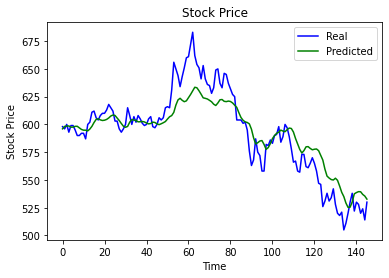

In [27]:
plt.plot(test_set[day:te], color = 'blue', label = 'Real')
plt.plot(predict_stock, color = 'green', label = 'Predicted')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [28]:
model.save('stock_5.h')